In [ ]:
#Héctor Vázquez Terreros
#Gael Peña Fonseca
#Vanessa Valdez Vazquez
import random  # Importamos la biblioteca random para generar números aleatorios
import numpy as np
import matplotlib.pyplot as plt
# Definimos la clase Cola
class Cola:
    def __init__(self):  # Constructor de la clase Cola
        self.cola = []  # Inicializamos una lista vacía para almacenar personas en la cola
    def llegada(self, persona):  # Método para agregar una persona a la cola
        """Agrega una persona a la cola."""
        self.cola.append(persona)  # Añadimos la persona a la lista de la cola
    def salida(self):  # Método para quitar y devolver la primera persona en la cola
        """Retorna y elimina a la primera persona en la cola."""
        if not self.vacio():  # Verificamos si la cola no está vacía
            return self.cola.pop(0)  # Retornamos y eliminamos la primera persona
        else:
            return None  # Si la cola está vacía, devolvemos None, None representa la ausencia de un valor o la falta de contenido en una variable
    def vacio(self):  # Método para verificar si la cola está vacía
        """Verifica si la cola está vacía."""
        return len(self.cola) == 0  # Devuelve True si la lista de la cola está vacía
# Definimos la clase Persona con los atributos necesarios tal y como lo vimos en clase

class Persona:
    #la class persona simulara una persona que es atendida en el centro de llamadas
    def __init__(self, h_ll, h_a, h_s, tipo):  # Constructor de la clase Persona
        self.h_llegada = h_ll  # Hora de llegada de la persona
        self.h_atencion = h_a  # Hora de atención de la persona
        self.h_salida = h_s  # Hora de salida de la persona
        self.tipo_de_cliente = tipo  # Tipo de cliente (normal o premier)

    def __str__(self):  # Método para representar la persona como una cadena, estos nos servira para poder imprimir los detalles de cada persona asi como tambien el como interactuan en la clase "simulacion de centro de llamadas"
        cadena_de_impresion = ""  # Inicializamos la cadena de impresion domo una cadena vacía
        cadena_de_impresion += "Hora de llegada : " + str(self.h_llegada) + ' mins\n' # representamos la hora de llegada
        cadena_de_impresion += "Hora de atención : " + str(self.h_atencion) + ' mins\n'#la hora de atencion del cliente
        cadena_de_impresion += "Hora de salida : " + str(self.h_salida) + ' mins\n' #hora de salida del cliente
        if self.tipo_de_cliente == 0:  # 0 Si el cliente es tipo normal
            cadena_de_impresion += 'Tipo: Normal.'#La variable "cadena de impresion"  guarda el string "tipo normal"
        else: #En otro caso
            cadena_de_impresion += 'Tipo: Premier'  # Si no, es tipo premier
        return cadena_de_impresion  # Devolvemos la cadena formada

def simulacion_Call_center(num_servidores):  # Función para simular el centro de llamadas
    cola = Cola()  # Creamos una instancia de Cola para gestionar la cola de espera de las personas que son ate ndidas en el centro de llamadas
    tiempos_espera = []  # inicializamos una lista para almacenar los tiempos de espera
    num_clientes = random.randint(100, 100000)  # numero de clientes a simular, en este caso, seran 50,000 personas
    tiempo_actual = 0  # Inicializamos el tiempo actual en 0
    clientes_atendidos = []  # esta lista sirve para almacenar los clientes que han sido atendidos
    servidores_libres = [0] * num_servidores  # inicializamos una lista con el tiempo de finalización de cada servidor

    num_clientes_premier = 0
    num_clientes_normales = 0
    for c in range(num_clientes):  # recorremos el ciclo for  sobre el número de clientes

        tiempo_llegada = random.uniform(1, 3)  # generamos un tiempo de llegada, la prctica nos dice que es de uno a tres minutos.
        tipo_cliente = 1 if random.random() < (1 / 6) else 0  # Determinamos el tipo de cliente, la practica nos dice que se estima que uno de cada seis clientes sea del tipo "premier". estos tendran prioridad y seran atendidos antes que las personas de tipo "normal"
        # Creamos una nueva instancia de Persona con el tiempo de llegada acumulado
        nuevo_cliente = Persona(tiempo_actual + tiempo_llegada, 0, 0, tipo_cliente)
        tiempo_actual += tiempo_llegada #Se acumula el tiempo de llegada al tiempo actual, actualizando así el momento en que se está procesando la llegada del nuevo cliente.
        # Verificar servidores libres
        Num_servidor = next((i for i, t in enumerate(servidores_libres) if t <= tiempo_actual), None) #Si Num_servidor es diferente de None, significa que hay un servidor disponible y el cliente puede ser atendido inmediatamente. Si es None, el cliente debe esperar y se añade a la cola.
        #Esta función toma el primer valor que cumple la condición y lo devuelve. Si no hay servidores disponibles, devolverá None.
        if tipo_cliente == 1: # Aquí se cuenta cuántos clientes de cada tipo han llegado
         num_clientes_premier += 1 #Si el tipo_cliente es 1, incrementa el contador de clientes premier
        else:#De lo contrario, incrementa el contador de clientes normales.
         num_clientes_normales += 1

        if Num_servidor is not None:  # Si encontramos un servidor libre
            # Servidor disponible
            tiempo_atencion = nuevo_cliente.h_atencion = random.uniform(1, 80)+1  # Generamos un tiempo de atención aleatorio
            nuevo_cliente.h_salida = tiempo_actual + tiempo_atencion  # Calculamos la hora de salida
            servidores_libres[Num_servidor] = nuevo_cliente.h_salida  # Actualizamos el tiempo de finalización del servidor
            clientes_atendidos.append(nuevo_cliente)  # Añadimos el cliente a la lista de atendidos
            tiempos_espera.append(0)  # No hay tiempo de espera, ya que fue atendido de inmediato
        else:               #si no se culple lo anterior, entonces, todos los servidores ocupados
            cola.llegada(nuevo_cliente)  # Agregamos el cliente a la cola
            tiempos_espera.append(max(0, max(servidores_libres) - tiempo_actual))  # Calculamos el tiempo de espera de las personas
    T = tiempos_espera
    E = print('tiempo de espera promedio ', np.mean(T)) #Tiempo de espera promedio con 19 lineas

    # Resultados de la simulación obtenidos de la simulación entre los objetos

    print("Número de clientes atendidos: " + str(len(clientes_atendidos)))  # Imprimimos el número de clientes atendidos

    # Imprimir detalles de cada cliente atendido(solo nos tiene )
   #for i, cliente in enumerate(clientes_atendidos, 1): # iniciamos un cliclo for, en donde Iteramos sobre los clientes atendidos
  # estos prints ayudan a saber cómo evoluciona la simulación identificando los atributos y tiempos de cada cliente
        #print(" Número del cliente: " + str(i))  # imprimimos el número del cliente
        #print("Tiempo de llegada:  " + str(cliente.h_llegada) + " mins")  # imprimimos el tiempo de llegada
        #print("Tiempo de salida: " + str(cliente.h_salida) + " mins")  # imprimimos el tiempo de salida del cliente
        #print("Tiempo total de atención: " + str(cliente.h_salida - cliente.h_llegada) + " mins")  #imprimimos el tiempo durante el cual se atenmdio al cliente
        #print("Tipo de cliente: " + ('Premier' if cliente.tipo_de_cliente == 1 else 'Normal'))  #impimimos el tip0 de cliente que es
    print("Número de clientes Normales:", num_clientes_normales)
    print("Número de clientes Premier:", num_clientes_premier)






# Declaración del método main porque sí xd
if __name__ == "__main__":
    num_servidores = 19  # Número de servidores para realizar la simulación
    simulacion_Call_center(num_servidores)  # Llamamos a la función de simulación

tiempo de espera promedio  10.483142609637783
Número de clientes atendidos: 41701
Número de clientes Normales: 41722
Número de clientes Premier: 8278


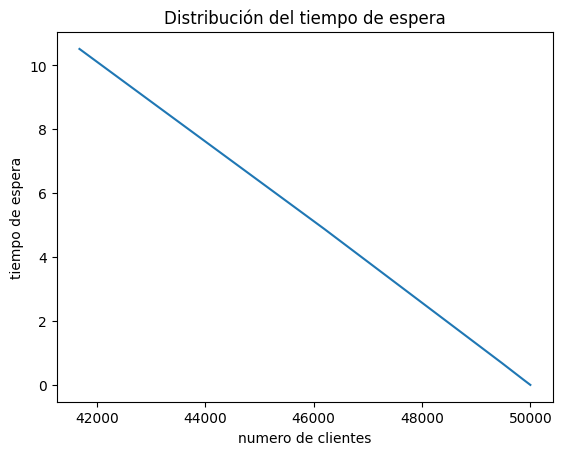

In [ ]:
#50000 clientes fijos, servidores aleatorios
n_clientes_normales = [41681, 43253, 46198, 48280, 49473, 49877, 49983, 50000]
tiempo_promedio = [10.512941393578298,  8.551231459713758, 4.88031093362514, 2.214951928273469, 0.6879092664092294, 0.15849055253672847, 0.022408393273281507, 0.0]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

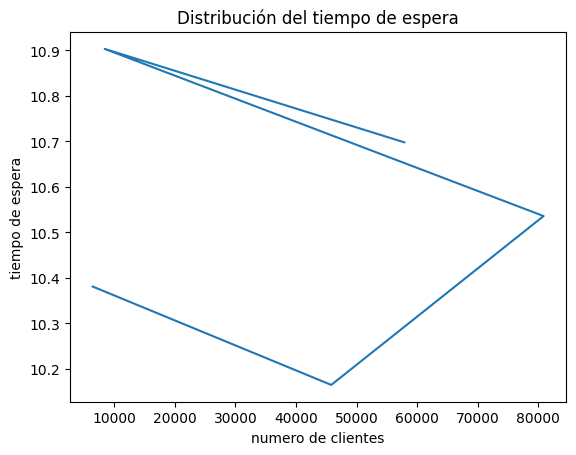

In [ ]:
#numero de servidores: 19
n_clientes_normales = [6439, 45820, 80876, 8426, 57886]
tiempo_promedio = [10.380837170743073,  10.164527519030253, 10.53588382339435, 10.903420951598195, 10.697994115889987]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

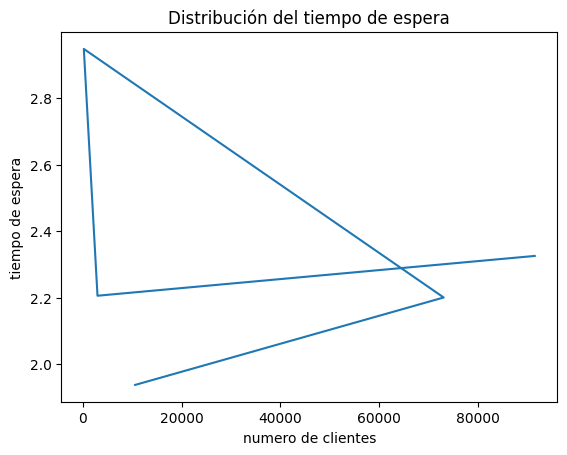

In [ ]:
#numero de servidores: 24
n_clientes_normales = [10568, 73112, 168, 2940, 91567]
tiempo_promedio = [1.9375242553370735,  2.2004429231478295, 2.947935925487857, 2.205739459913432, 2.325423411728537]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

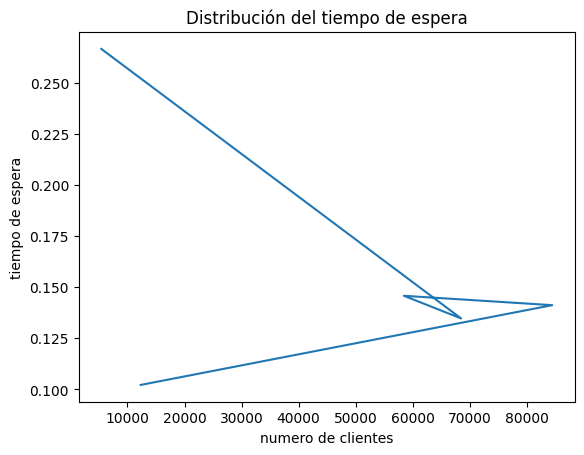

In [ ]:
#numero de servidores: 28
n_clientes_normales = [5416, 68481, 58446, 84451, 12319]
tiempo_promedio = [0.2664851990688748, 0.1346745589918064, 0.14574814119421228, 0.14116652481415565, 0.1021590469610238]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

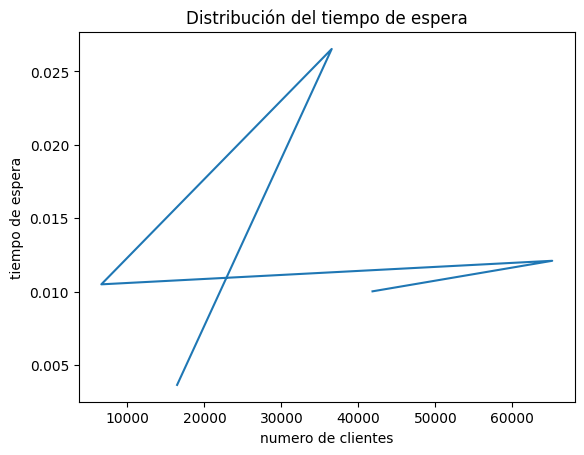

In [ ]:
#numero de servidores: 30
n_clientes_normales = [16451, 36535, 6608, 65173, 41832]
tiempo_promedio = [0.003636578264422574, 0.02653852851700477, 0.010492405277707095, 0.012097475928716442, 0.010015692891277897]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

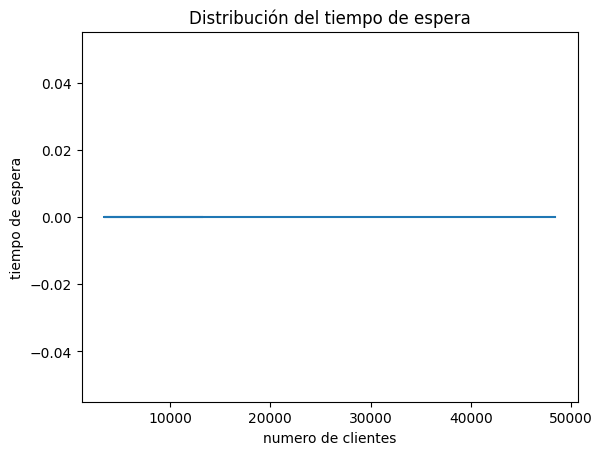

In [ ]:
#numero de servidores: 32
n_clientes_normales = [13161, 3435, 14313, 30221, 48384]
tiempo_promedio = [ 0.0, 0.0, 0.0, 0.0, 0.0]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()

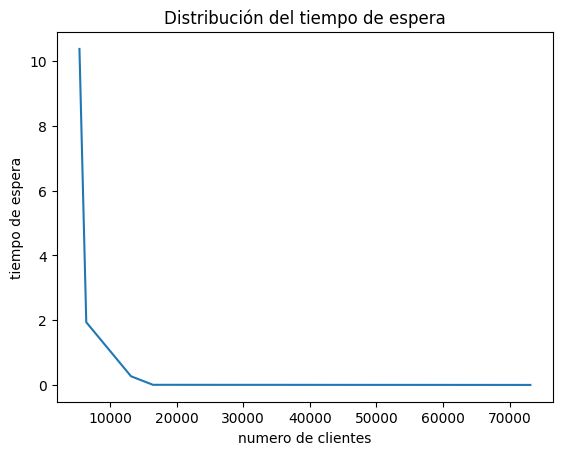

In [ ]:
#clientes y servidores aleatorios
n_clientes_normales = [5416, 6439, 13161, 16451, 73112]
tiempo_promedio = [ 10.380837170743073, 1.9375242553370735, 0.2664851990688748, 0.003636578264422574, 0.0]
plt.plot(n_clientes_normales, tiempo_promedio)
plt.xlabel("numero de clientes")
plt.ylabel("tiempo de espera")
plt.title("Distribución del tiempo de espera")
plt.show()